In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


warnings.filterwarnings("ignore", category=FutureWarning, message="is_categorical_dtype is deprecated")


<h3>Datatypes of the columns</h3>

In [2]:
data = pd.read_csv('insurance.csv')
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<h2>Categorical Variables:</h2>
    <ul>
        <li>sex (object)</li>
        <li>smoker (object)</li>
        <li>region (object)</li>
    </ul>
    <p>Total categorical variables: 3</p>

<h2>Numerical Variables:</h2>
    <ul>
        <li>age (int64)</li>
        <li>bmi (float64)</li>
        <li>children (int64)</li>
        <li>charges (float64)</li>
    </ul>
    <p>Total numerical variables: 4</p>

<h3>Shape of the data</h3>

In [3]:
data.shape

(1338, 7)

<h2>Shape of data:</h2>
    <ul>
        <li>1338 (raws)</li>
        <li>7 (columns)</li>
    </ul>

<h3>Dealing with missing value</h3>

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<p>The dataset is clean with no missing data</p>

<h3>Exploring the relationship between the feature and target column </h3>

<h5> age,bmi,children and charges are numerical columns so we'll perform on them scatter plot</h5>

Text(0.5, 1.0, 'Charges vs BMI')

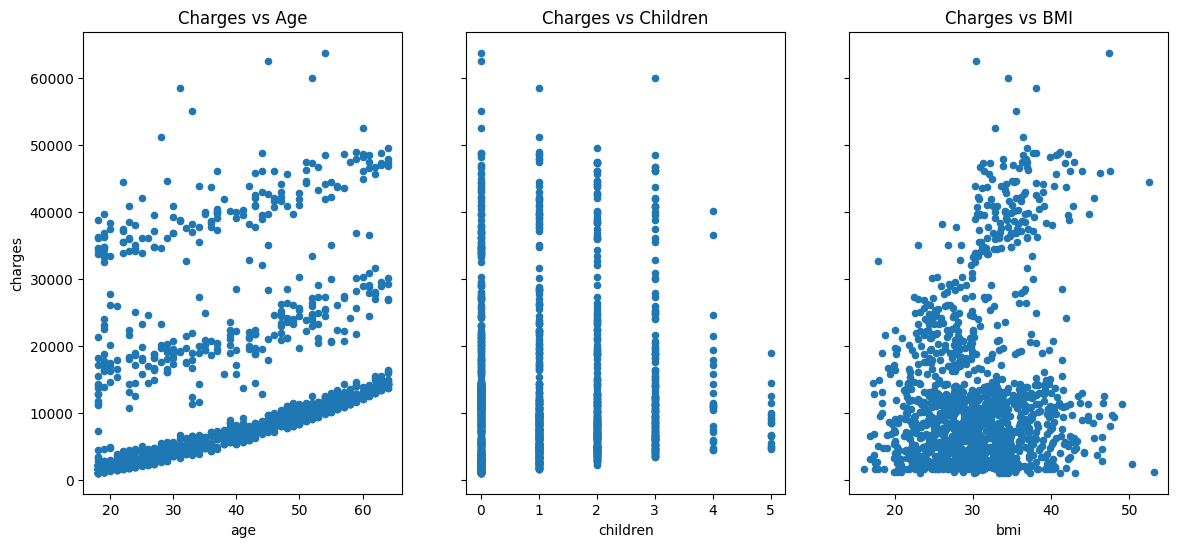

In [5]:
fig,axs = plt.subplots(1,3,sharey = True)
data.plot(kind = 'scatter',x='age',y='charges',ax=axs[0],figsize=(14,6))
data.plot(kind = 'scatter',x='children',y='charges',ax=axs[1])
data.plot(kind = 'scatter',x='bmi',y='charges',ax=axs[2])

axs[0].set_title('Charges vs Age')
axs[1].set_title('Charges vs Children')
axs[2].set_title('Charges vs BMI')

<p>There is a positive correlation between age and charges,as age increases,charges tend to increase. </p>
<p>There isn’t a clear trend between the number of children and the charges. 
The points are widely scattered, showing that the number of children doesn’t affects charges.</p>
<p>There seems to be a moderate positive correlation between BMI and charges, 
where higher BMI values are linked with higher charges.</p>

<h5> sex,smoker and region are categorical columns so we'll perform on them count plot</h5>

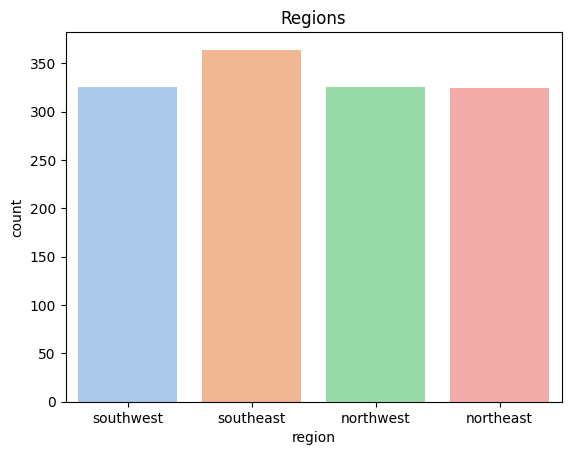

In [6]:
sns.countplot(data=data,x='region',palette='pastel')
plt.title('Regions')
plt.show()

<p>Southeast Region is the most region in the data</p>

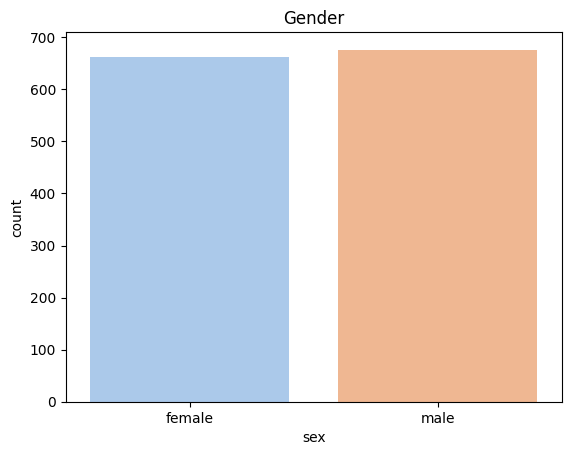

In [7]:
sns.countplot(data=data,x='sex',palette='pastel')
plt.title('Gender')
plt.show()

<p>Males and females are almost equal</p> 

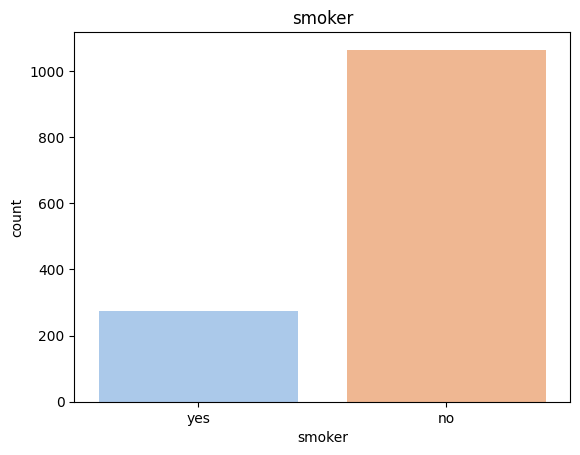

In [8]:
sns.countplot(data=data,x='smoker',palette='pastel')
plt.title('smoker')
plt.show()

<p>Smokers are less than non smokers</p>

<h3>Plotting of Feature vs Feature Plots</h3>

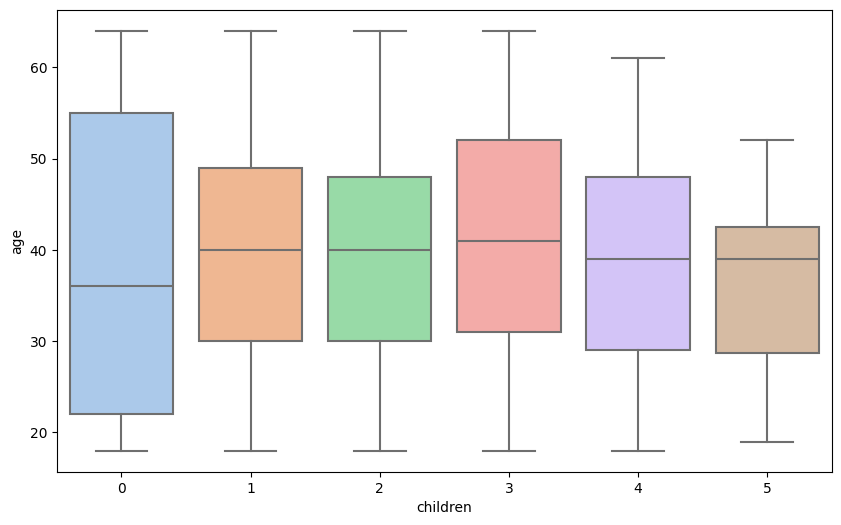

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='age',data=data,palette='pastel')
plt.show()

C:\Users\khi00\AppData\Local\Temp\ipykernel_29264\342903545.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_avg_charges = data.groupby('age_category')['charges'].mean()


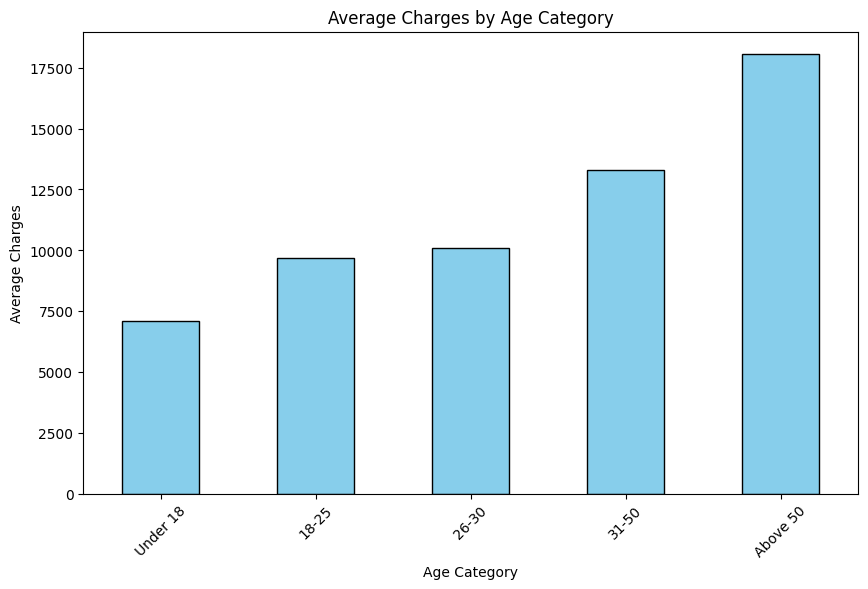

In [10]:
bins = [0, 18.5, 25, 30, 50, 100]
labels = ['Under 18', '18-25', '26-30', '31-50', 'Above 50']

data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels)

age_category_avg_charges = data.groupby('age_category')['charges'].mean()


plt.figure(figsize=(10, 6))
age_category_avg_charges.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Category')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Category')
plt.xticks(rotation=45)  
plt.show()

<p>There is a positive relationship between age and Charges, <br>
with higher age categories generally leading to higher average charges.</p>

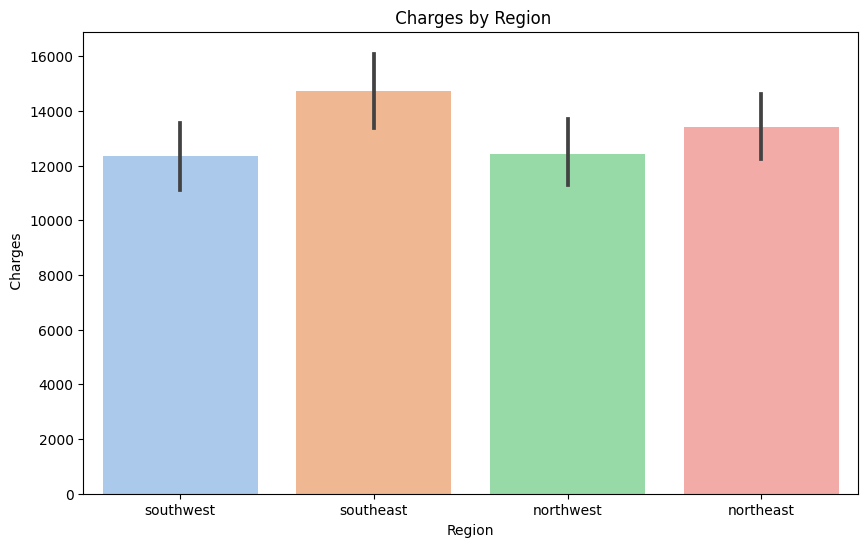

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=data, palette='pastel')
plt.xlabel('Region')
plt.ylabel(' Charges')
plt.title(' Charges by Region')
plt.show()

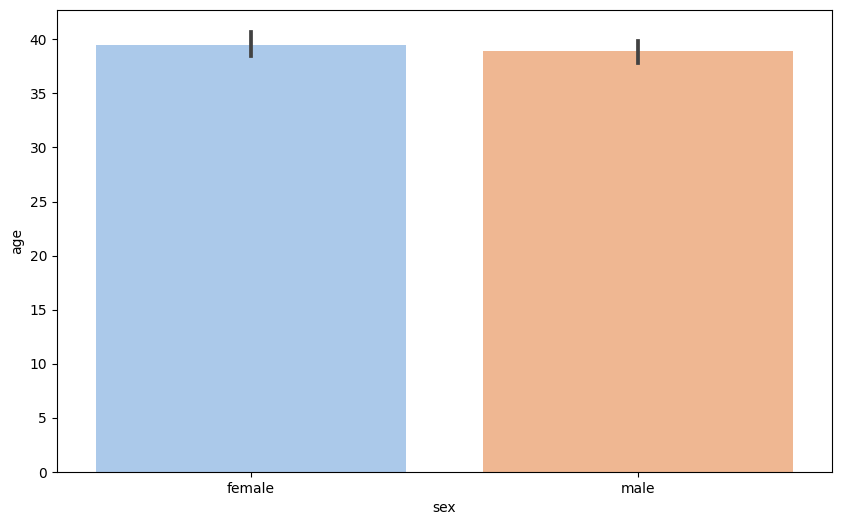

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='sex',y='age',data=data,palette='pastel')
plt.show()

<Figure size 800x500 with 0 Axes>

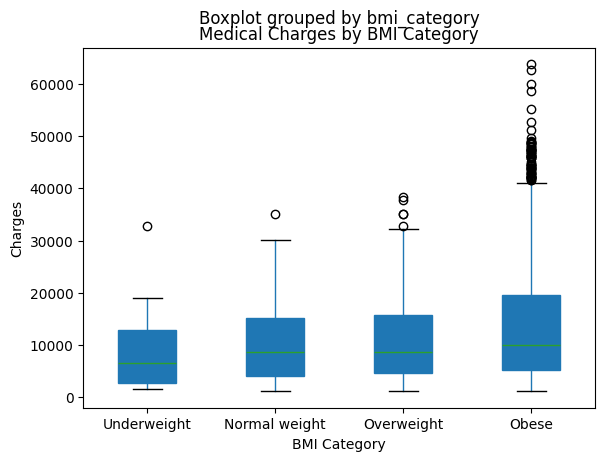

In [13]:
bins = [0, 18.5, 25, 30, 50]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
data.boxplot(column='charges', by='bmi_category', grid=False, patch_artist=True)
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.title('Medical Charges by BMI Category')
plt.show()

<p>There is a positive relationship between BMI and Charges, <br>
with higher BMI categories generally resulting  higher average charges.</p>

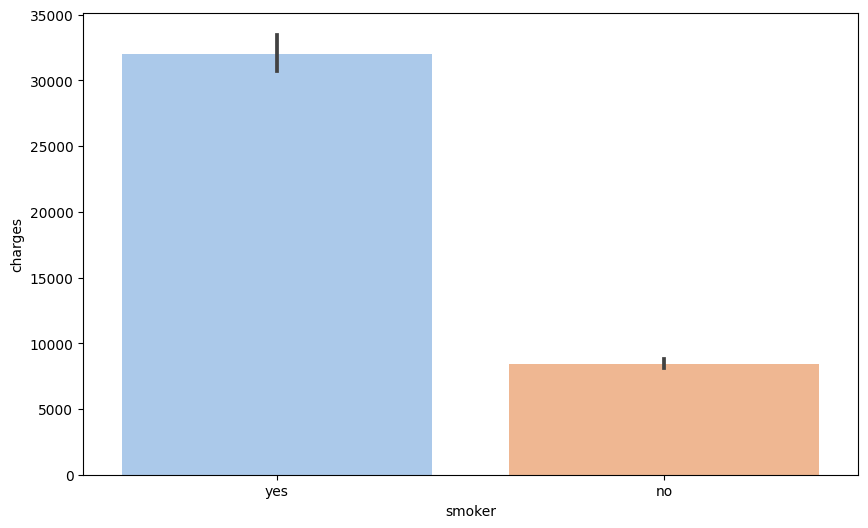

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='smoker',y='charges',data=data,palette='pastel')
plt.show()

<p>There is a positive relationship between Smoker and Charges, 
with higher smokers reflect higher cost charges.</p>

In [15]:
data_filtered = data[['age', 'charges', 'smoker']]


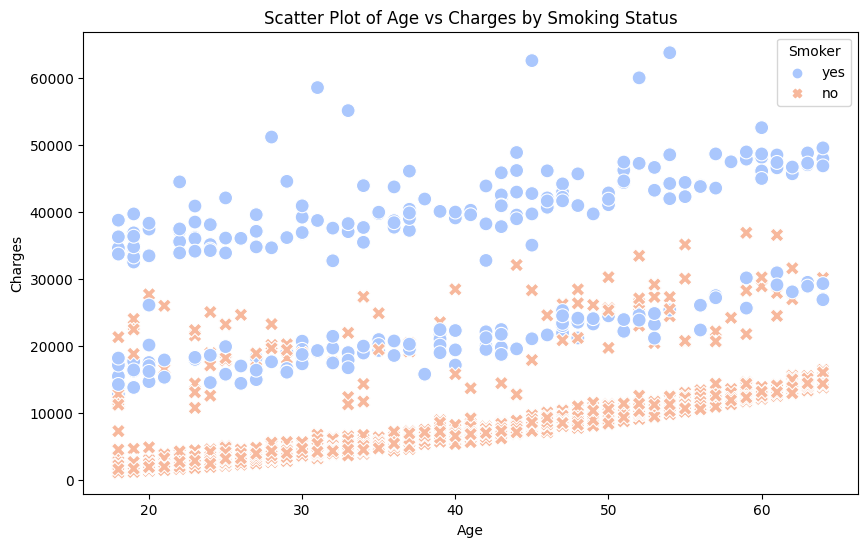

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data_filtered, palette='coolwarm', style='smoker', s=100)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs Charges by Smoking Status')
plt.legend(title='Smoker')
plt.show()

<p>As insurance holders are smokers the amount of charges is becoming higher with respect to age increase  </p>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = data[['age', 'smoker']]
y = data['charges']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(), ['smoker'])
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




# Print results
print(f"Mean Squared Error: {mse}")
print(f"R Sqaured: {r2}")





Mean Squared Error: 38274699.675041825
R Sqaured: 0.7534620778716639


<h4>Making prediction </h4>

In [19]:
new_data = pd.DataFrame({'age': [19], 'smoker': ['yes']})
predicted_charges = model.predict(new_data)

print(f"Predicted Charges for new data: {predicted_charges[0]}")


Predicted Charges for new data: 26545.412779517086


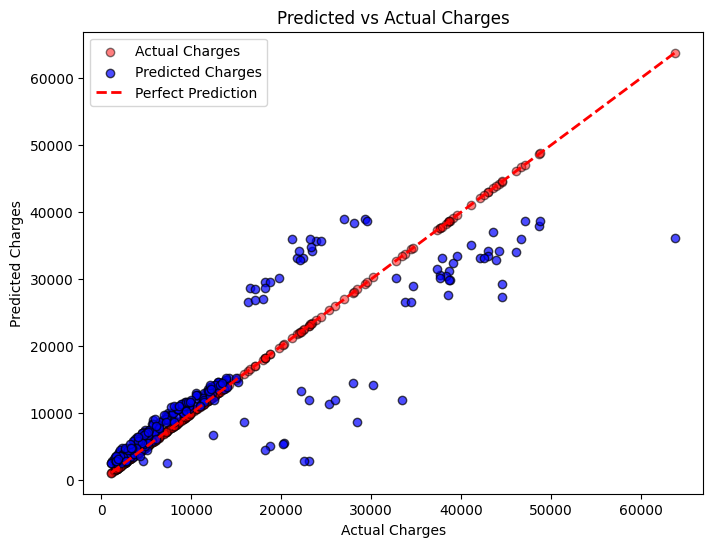

In [20]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='red', label='Actual Charges', alpha=0.5, edgecolor='k')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted Charges', alpha=0.7, edgecolor='k')

# diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.legend()

# Show plot
plt.show()



<p>After applying linear regression the predicted values become far from diagonal line which proves as a poor model </p>

<h4>Apply polynamial Regression and adding new variable bmi</h4>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target
X = data[['age', 'smoker','bmi']]
y = data['charges']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','bmi']),
        ('cat', OneHotEncoder(drop='first'), ['smoker'])  # drop='first' avoids the dummy variable trap
    ])

# Create Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create and train the Ridge regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('regressor', Ridge(alpha=1.0))  # alpha is the regularization parameter
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Example of making a new prediction
new_data = pd.DataFrame({'age': [19], 'smoker': ['yes'],'bmi':[29]})
predicted_charges = model.predict(new_data)
print(f"Predicted Charges for new data: {predicted_charges[0]}")


Mean Squared Error: 21539421.75531167
R^2 Score: 0.8612586296303939
Predicted Charges for new data: 25316.399937213057


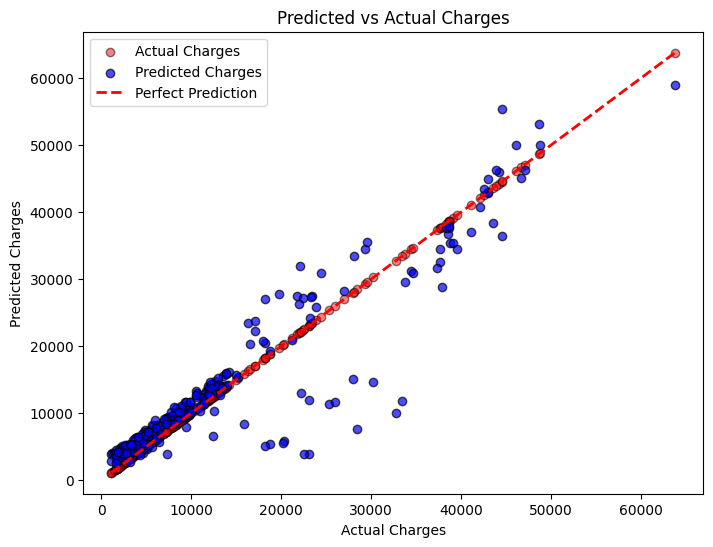

In [22]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='red', label='Actual Charges', alpha=0.5, edgecolor='k')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted Charges', alpha=0.7, edgecolor='k')

# diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.legend()

# Show plot
plt.show()


<p>After applying polynomial regression the predicted values become closer to diagonal line which proves as a good model </p>